<a href="https://colab.research.google.com/github/hasanasyarie/Project-Dicoding/blob/main/NLP_Sentiment_Analysis_using_LSTM_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**Intro**

Pada notebook kali ini saya membuat proyek untuk melakukan sentiment analysis emotion detection menggunakan dataset yang saya peroleh dari kaggle. Tujuan dari proyek ini yaitu untuk mendeteksi emosi dari sebuah teks. 

####**Import Library**

In [ ]:
import pandas as pd                      
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

####**Load Dataset**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hasanasyarie/Data/main/Emotion_final.csv')
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
# Mengecek data kosong
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [ ]:
# Melihat dimensi data
df.shape

(21459, 2)

In [ ]:
df['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

####**Membersihkan Text**

In [ ]:
def clean(text):
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub('#', '', text)
    text = re.sub('\w+:\/\/\S+', '', text)
    text = re.sub('RT[\s]+', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('(\\\\u([a-z]|[0-9])+)', ' ', text)
    text = re.sub(r'"', '', text)
    text = re.sub(r':', '', text)
    text = text.lower()
    return text

In [ ]:
df['clean_text'] = df['Text'].apply(clean) 
df.head()

,Text,Emotion,clean_text
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy


####**Proses One-Hot-Encoding**

In [ ]:
category = pd.get_dummies(df.Emotion)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns=['Emotion','Text'])
df_baru.head()

,clean_text,anger,fear,happy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0


In [ ]:
txt = df_baru['clean_text'].values
label = df_baru[['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']].values

####**Membagi Data Training dan Data Testing**

In [ ]:
txt_train, txt_test, label_train, label_test = train_test_split(txt, label, test_size=0.2)

####**Proses Tokenisasi**

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(txt_train) 
tokenizer.fit_on_texts(txt_test)
 
seq_train = tokenizer.texts_to_sequences(txt_train)
seq_test = tokenizer.texts_to_sequences(txt_test)
 
pad_train = pad_sequences(seq_train) 
pad_test = pad_sequences(seq_test)

####**Membuat Fungsi Callback**

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

####**Membangun Model LSTM**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

**Compile Model**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**Training Model**

In [ ]:
history = model.fit(pad_train, 
                    label_train, 
                    epochs=50, 
                    validation_data=(pad_test, label_test), 
                    verbose=2,
                    callbacks=[callbacks])

Epoch 1/50
537/537 - 49s - loss: 1.4798 - accuracy: 0.3507 - val_loss: 1.1799 - val_accuracy: 0.4329 - 49s/epoch - 90ms/step
Epoch 2/50
537/537 - 43s - loss: 0.9208 - accuracy: 0.6141 - val_loss: 0.7255 - val_accuracy: 0.7127 - 43s/epoch - 80ms/step
Epoch 3/50
537/537 - 43s - loss: 0.6174 - accuracy: 0.7421 - val_loss: 0.6192 - val_accuracy: 0.7386 - 43s/epoch - 80ms/step
Epoch 4/50
537/537 - 43s - loss: 0.4893 - accuracy: 0.7850 - val_loss: 0.5479 - val_accuracy: 0.7710 - 43s/epoch - 80ms/step
Epoch 5/50
537/537 - 43s - loss: 0.4004 - accuracy: 0.8251 - val_loss: 0.5196 - val_accuracy: 0.8206 - 43s/epoch - 79ms/step
Epoch 6/50
537/537 - 45s - loss: 0.3365 - accuracy: 0.8682 - val_loss: 0.4217 - val_accuracy: 0.8702 - 45s/epoch - 84ms/step
Epoch 7/50

Akurasi telah mencapai >90%!
537/537 - 43s - loss: 0.2526 - accuracy: 0.9143 - val_loss: 0.4317 - val_accuracy: 0.8812 - 43s/epoch - 80ms/step


####**Plotting Akurasi dan Loss**

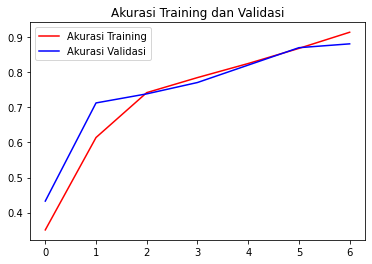

<Figure size 432x288 with 0 Axes>

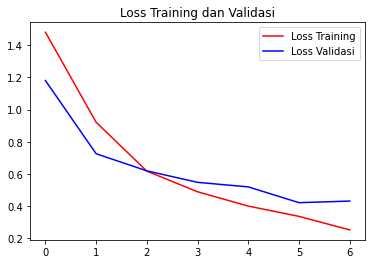

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']      
loss = history.history['loss']             
val_loss = history.history['val_loss']    

epochs = range(len(acc))                                 

plt.plot(epochs, acc, 'r', label = 'Akurasi Training')             
plt.plot(epochs, val_acc, 'b', label = 'Akurasi Validasi')    
plt.title('Akurasi Training dan Validasi')                    
plt.legend(loc = 0)                                         
plt.figure()                                             
plt.show()                                                  

plt.plot(epochs, loss, 'r', label = 'Loss Training')           
plt.plot(epochs, val_loss, 'b', label = 'Loss Validasi')        
plt.title('Loss Training dan Validasi')                      
plt.legend(loc = 0)           
plt.figure()                 
plt.show()            